# Gussian Transformation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [7]:
data=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
def impute_na(data,variable):
    # function with fill na with random value
    df= data.copy()
    
    # random sampling
    df[variable+"_random"] = df[variable]
    
    #extract the random sample to fill the  na 
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample
    
    return df[variable+"_random"]

In [14]:
data["Age"]=impute_na(data,"Age")

In [15]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

##  Q-Q Plot

In [21]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side for a certain value
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm", plot=plt)
    plt.show()

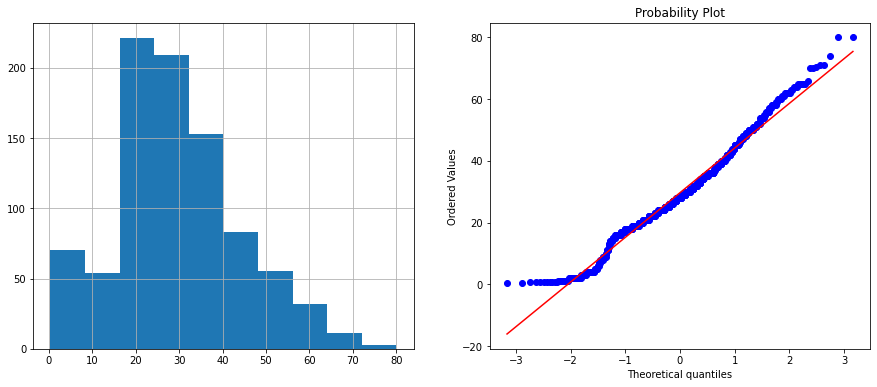

In [22]:
diagnostic_plots(data,"Age")

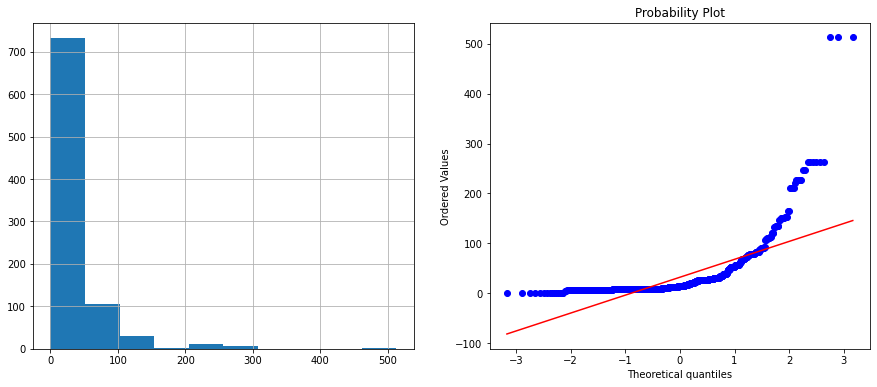

In [23]:
diagnostic_plots(data,"Fare")

### Logarithmic Transformation

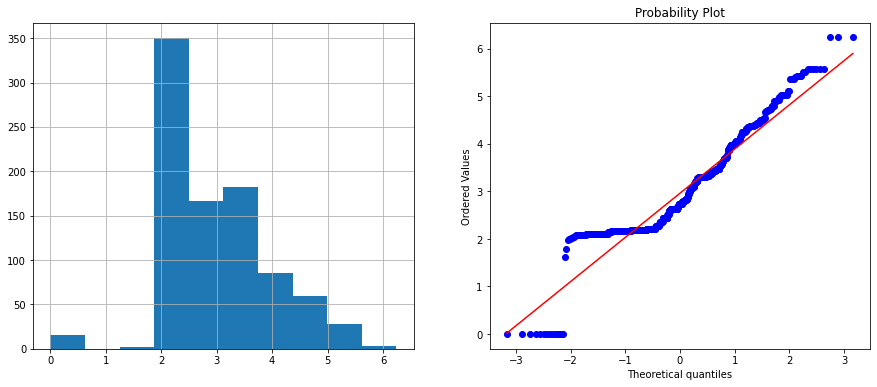

In [24]:
data["Log_Fare"]=np.log(data["Fare"]+1)
diagnostic_plots(data,"Log_Fare")

the logarithmic distribution does agood job in making square variable look in Gaussian distribustion

# Reciprocal Transformation

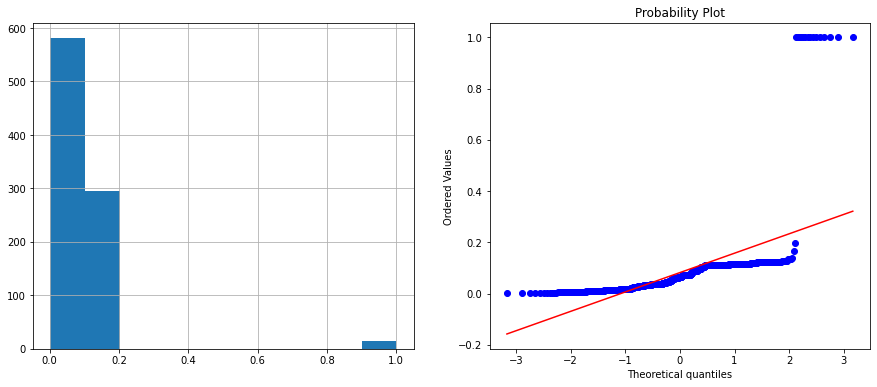

In [25]:
data["Rec_Fare"]=1/(data["Fare"]+1)
diagnostic_plots(data,"Rec_Fare")

## Square Root Transformation

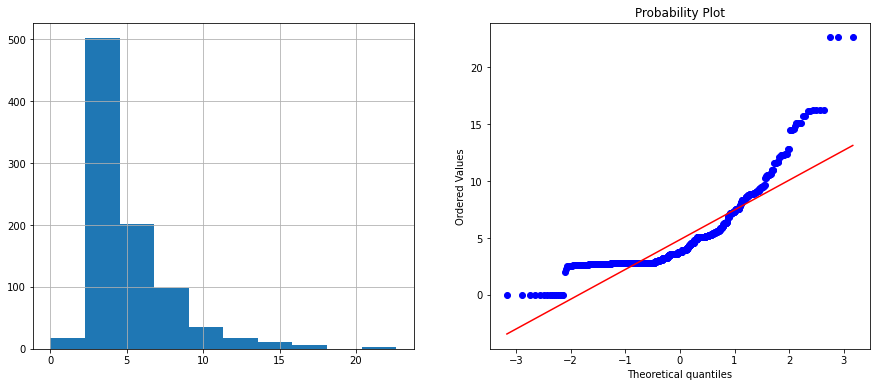

In [26]:
data["sqr_Fare"]=data["Fare"]**(1/2)
diagnostic_plots(data,"sqr_Fare")

## Exponential Transformation

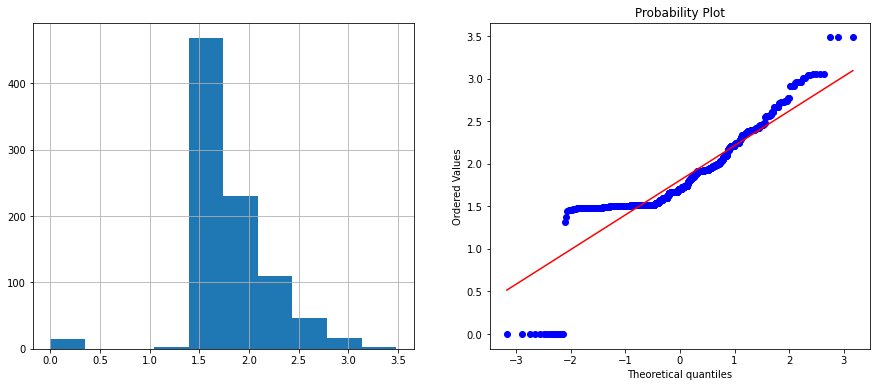

In [27]:
data["Exp_Fare"]=data["Fare"]**(1/5)
diagnostic_plots(data,"Exp_Fare")

## BoxCox

optional lambda: -0.09778702818680361


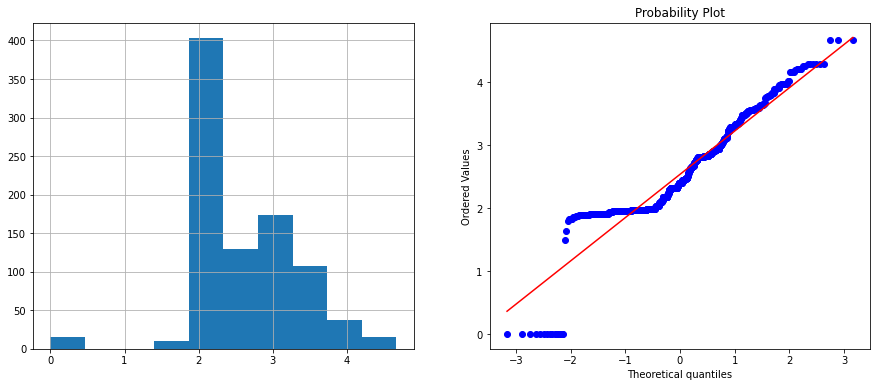

In [28]:
data["Fare_boxcox"],param = stats.boxcox(data.Fare+1)
print("optional lambda:", param)
diagnostic_plots(data,"Fare_boxcox")